## 🌟 문제 :  
한국 스포츠(K - LEAGUE)는 관중 유입에 여러움을 겪고 있음 

## ⏩ 해결 : 
    구단 매출을 향상시킬 수 있는 마케팅이 필요함 

    - 고객데이터 활용을 중심으로 '티켓 마케팅'
            
    - 기존 고객을 분류해서 고객군 별 특징을 잡고 적절한 프로모션이 중요한 포인트

## 🏅 프로젝트 목표 

1 ) 결과 및 측정 데이터 분석 및 예매 예측

2 ) 예매 촉진 지표 분석 및 적정 프로모션 수준 예측

3 ) 소비자의 경기 참여 예매 촉진을 위해 프로모션 대상자 세분화 및 경기 참여 촉진 방법 제안

## 💡 가설
- 지난 경기 관람 여부, 순위, 경기 결과의 영향을 받아 경기 예매 수가 늘어나고 금액이 늘어날 것이다
- 고객 등급이 높을 수록 고급좌석을 예매할 것이다

### 🚩 분석에 맞는 데이터 프레임 생성

#### 1) final 데이터프레임 생성
#### 2) survey 데이터프레임 생성

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
rt2 = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/reserve_ticket_2022 - reserve_ticket_2022.csv')

📍 EDA

In [2]:
# match팀 이름 정리하기 

rt2['match_info'] = rt2['match_info'].replace([
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs FC서울',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 포항 스틸러스',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 김천상무프로축구단',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 울산 현대축구단',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 제주 유나이티드',
       '[2022 하나원큐 FA CUP] 인천 유나이티드 vs 광주FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 전북 현대모터스',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 대구FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 성남FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 강원FC',
       '[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원FC'
       ],
       ['수원 삼성블루윙즈','FC서울','포항 스틸러스','김천상무프로축구단','울산 현대축구단','제주 유나이티드','광주FC','전북 현대모터스','대구FC','성남FC','강원FC','수원FC'])

# 리그 아닌 CUP 삭제하기 ==> 초점을 '리그'
idx = rt2[rt2['match_info'] == '광주FC'].index
rt2 = rt2.drop(idx)

📍 경기순위가 예매와 상관있다고 판단

In [3]:
# rank 데이터 만들고 데이터 합치기 
ranking = pd.DataFrame({'date' : ['2022-02-19', '2022-02-26', '2022-03-05', '2022-03-13',
       '2022-04-02', '2022-04-10', '2022-04-27', '2022-05-08',
       '2022-05-17', '2022-05-29', '2022-06-22', '2022-07-06',
       '2022-08-03', '2022-08-13', '2022-08-27', '2022-09-02',
       '2022-09-14', '2022-10-01', '2022-10-11', '2022-10-16'],
       'rank' : [2,4,4,3,2,2,4,4,3,4,4,5,5,4,3,4,4,4,4,4]})

rt2 = pd.merge(rt2, ranking, left_on = 'game_date', right_on='date', how = 'inner')

📍 경기 관람 고객 ,경기 미관람 고객으로 구분

문제 :) 취소를 했지만 취소시간이 없음, 취소를 하지 않았지만 취소시간이 존재
    ➡ 취소시간이 존재하면 취소했다고 가정하고 진행

정보 :) 미관람 고객 : 5323명, 관람 고객 : 47886명

➡ 관람고객만을 분석 대상으로 진행


In [4]:
# # 취소했는데 취소시간이 있기 때문에 취소하지 않았다고 바꿈
idx = rt2.loc[(rt2['cancel_yn'] == 'Y')&(rt2['cancel_datetime'].isnull())].index
a = ['N'] * 4091
rt2.loc[idx, "cancel_yn"] = a

# 취소 안 했는데 취소시간이 존재하는 경우 취소했다고 바꿈
idx2 = rt2.loc[(rt2['cancel_yn'] == 'N')&(rt2['cancel_datetime'].str.contains('2022'))].index #337
b = ['Y'] * 337

rt2.loc[idx2, "cancel_yn"] = b

# 5323 # 취소했음
rt2_Y = rt2.loc[rt2['cancel_yn'] == 'Y']
# 47886 # 취소하지 않음 
rt2_N = rt2.loc[rt2['cancel_yn'] == 'N']

📍할인 여부에 대한 컬럼생성

In [5]:
rt2_N['product_denomination_name'].unique()

rt2_N.loc[(rt2_N['product_denomination_name'] == '성인') | (rt2_N['product_denomination_name'] == '청소년/어린이')
| (rt2_N['product_denomination_name'] == '일반') | (rt2_N['product_denomination_name'] == '성인/청소년/어린이')
| (rt2_N['product_denomination_name'] == '청소년') | (rt2_N['product_denomination_name'] == '어린이'), 'sale'] = 'N'

rt2_N.loc[rt2_N['sale'].isna(), 'sale'] = 'Y'

In [6]:
rt2_N_c = rt2_N.copy()
# 필요없는 컬럼 삭제하기 
rt2_N1 = rt2_N_c.drop(['cancel_datetime','detail_cancel_date_time','cancel_yn','date'], axis = 1)

📍 청중수

In [7]:
rt2_N_c = rt2_N.copy()

schedule_new = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/2022schedule.csv')

# 필요없는 값 삭제하기 
rt2_N1 = rt2_N_c.drop(['cancel_datetime','detail_cancel_date_time','cancel_yn','date'], axis = 1)

# 청중 데이터 만들고 병합하기 
A = schedule_new[schedule_new['home_team_name']=='인천'][['game_date','audience']]
list(A['audience'])
audience = pd.DataFrame({'game_date' : ['2022-02-19', '2022-02-26', '2022-03-05', '2022-03-13',
       '2022-04-02', '2022-04-10', '2022-05-08', '2022-05-17',
       '2022-05-29', '2022-06-22', '2022-07-06', '2022-08-03',
       '2022-08-13', '2022-08-27', '2022-09-02', '2022-09-14',
       '2022-10-01', '2022-10-11', '2022-10-16'],
'audience' : [5382,4618,3581,2607,7054, 5234, 7597, 2754, 6119, 2509, 3647, 3731, 6339, 10139, 4372, 4472, 9251, 2970, 7592]})

rt2_N1 = pd.merge(rt2_N1, audience, left_on = 'game_date', right_on='game_date', how = 'inner')

# 성인, 청소년/어린이, 예매권북으로 분리하기 
from collections import OrderedDict
name = rt2_N1['product_denomination_name'].unique()
product_name = list(OrderedDict.fromkeys(name))

product_replace = ['성인','성인','성인','청소년/어린이','성인',
                   '성인','예매권북','성인','성인','성인',
                   '청소년/어린이','성인','성인','청소년/어린이','성인',
                   '청소년/어린이','성인','성인','청소년/어린이','청소년/어린이',
                   '성인','성인','성인','청소년/어린이','성인',
                   '성인','성인','성인','성인','성인',
                   '성인','성인','성인','성인']

product = {product_name[i] : product_replace[i] for i in range(len(product_name))}
rt2_N1['product_denomination_name'] = rt2_N1['product_denomination_name'].replace(product)

# # 구역 나누기 
from collections import OrderedDict
class1 = rt2_N1['product_grade_name'].unique()
product_grade_name1 = list(OrderedDict.fromkeys(class1))

product_replace2 = ['W1~W5 구역(World Class석)','S석/N석','E석 1층(Exciting석)','W6~W10 구역(With석)','프리미엄석 클래식','스카이라운지',
                   '하이네켄 테이블석(2인)','1인 테이블석(1인)','E석 2층(Expert석)','1인 테이블석(1인)','S석/N석',
                   '1인 테이블석(1인)','프리미엄석 골드','원정석', '피크닉 테이블석(2인)','W석 2층(Wide View석)',
                   '1인 테이블석(1인)','1인 테이블석(1인)','1인 테이블석(1인)','1인 테이블석(1인)']

product1 = {product_grade_name1[i] : product_replace2[i] for i in range(len(product_grade_name1))}
rt2_N1['product_grade_name'] = rt2_N1['product_grade_name'].replace(product1)

📍정규라운드, 예매권북, 파이널라운드로 분류하고 청소년, 성인으로 분류함

In [8]:
# 가격표
import pandas as pd
import numpy as np
price = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/티켓/정규라운드티켓 - 시트1 (1) - 정규라운드티켓 - 시트1 (1).csv')
price_c = price.copy()
# melt를 통해서 좌석으로 데이터프레임 재구조화 시켜줌
price_c = pd.melt(price_c, id_vars = ['좌석'] )
price_c.columns = ['product_grade_name', 'product_denomination_name','price']

book_t = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/티켓/예매권북 가격 - 시트1 (1).csv')
book_c = book_t.copy()
book_c = pd.melt(book_c, id_vars = ['좌석'])
book_c.columns = ['product_grade_name', 'product_denomination_name','price']
book_cc = book_c.loc[:7]
book_cc.loc[0:8, 'product_denomination_name'] = '예매권북'

# 예매권북이랑 전체 합치기
price_c = pd.concat([price_c, book_cc], axis = 0)
# 데이터 합치기 
rt2_N12 = pd.merge(left = rt2_N1, right = price_c, how = 'left', on=['product_grade_name', 'product_denomination_name'])

# 파이널 티켓가격
price_f = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/티켓/파이널라운드티켓 - 시트1 - 파이널라운드티켓 - 시트1.csv')
price_f = pd.melt(price_f, id_vars = '좌석')
price_f.columns = ['product_grade_name', 'product_denomination_name','price']
# price_f와 
price_f = pd.concat([price_f, book_cc], axis = 0)
# 줄여서 뽑는 방법 생각해 보기
rt2_N12_f = rt2_N12[(rt2_N12['game_date'] == '2022-10-01')|(rt2_N12['game_date'] =='2022-10-11')|(rt2_N12['game_date'] =='2022-10-16')]
rt2_N12_f = rt2_N12_f.drop(labels = 'price', axis = 1)

rt2_N12_f = pd.merge(left = rt2_N12_f, right = price_f, how = 'left', on=['product_grade_name', 'product_denomination_name'])

rt2_New = rt2_N12.loc[:36461]
rt2_new = pd.concat([rt2_New,rt2_N12_f])
# 스카이라운지는 다른 지정좌석이 없기 때문에 결측이 맞음 #129개

rt2_new = rt2_new.drop(['reserve_no', 'seat_Attribute_6','seat_Attribute_5','reserve_state_code'], axis = 1)

# 가격 , 값 변경하기 
rt2_new['price'] = rt2_new['price'].str.replace(',','')
rt2_new['price'] = rt2_new['price'].astype({'price' : int})

In [9]:
rt2_new['product_denomination_name'].value_counts(normalize=True)
# 70% # 30%

성인         0.648269
청소년/어린이    0.239945
예매권북       0.111786
Name: product_denomination_name, dtype: float64

📍멤버ID마다 같은 날 구매한 티켓가격 계산하기 

In [10]:
def e (game_date):
    
    ## reserve_detail_no 지우기 가능함 , duplicated도 지우기 가능함
    day = rt2_new[rt2_new['game_date']== game_date ]
    # 같은 product_denomination_name을 구매한 사람들 
    day[(day['membership_no'].duplicated())&(day['product_denomination_name'].duplicated())]

    # datetime뒤에 있는 숫자 제거해줌 !!
    datetime = day['reserve_datetime'].str.split(" ")
    date_li = []

    for i in datetime:
        date_li.append(i[0])
        
    day['reserve_datetime_new'] = date_li
    # day = day.drop('reserve_datetime', axis = 1)

    # 중복값 제거하고 데이터 프레임에다가 업뎃 (현 데이터프레임에는 중복값이 존재하지 않음!)
    b = day[day.duplicated(['membership_no','product_denomination_name','reserve_datetime_new'], keep = 'last')].index
    day = day.drop(b, axis = 0)

    # new_price에다가 구매한 표개수 만큼 값을 곱해줌
    day['new_price'] = day['reserve_detail_no'] * day['price']


    # 예약시간이랑 게임시간 차이 # reserve_diff
    datetime = day['reserve_datetime'].str.split(" ")
    date_li = []

    for i in datetime:
        date_li.append(i[0])
            
    day['reserve_datetime_new'] = date_li
    day = day.drop('reserve_datetime', axis = 1)

    b = pd.to_datetime(day['reserve_datetime_new'])
    a = pd.to_datetime(day['game_date'])

    diff = a - b
    day['reserve_diff'] = diff.astype(str)
    day['reserve_diff'] = day['reserve_diff'].str.replace(r'\D', '').astype(int)
            

    #삭제 
    day = day.drop(['reserve_detail_no', 'price','reserve_datetime_new'], axis = 1)
    # reserve_time
    return day


In [11]:
date_li = list(rt2_new['game_date'].unique())

rtrt = []
for i in date_li:
    rtrt.append(e(i))
    
rtrt = pd.concat(rtrt).reset_index(drop = True)
rtrt

,membership_no,game_date,game_time,match_info,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,rank,sale,audience,new_price,reserve_diff
0,102806,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932824,W1~W5 구역(World Class석),성인,W2구역,2,Y,5382,19000,5
1,138160,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932830,W1~W5 구역(World Class석),성인,W5구역,2,N,5382,57000,5
2,104910,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932835,W1~W5 구역(World Class석),성인,W4구역,2,Y,5382,19000,5
3,124453,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932843,W1~W5 구역(World Class석),성인,W4구역,2,Y,5382,38000,5
4,125125,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932876,S석/N석,청소년/어린이,S 4구역,2,N,5382,6000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,141725,2022-10-16,19:00:00,포항 스틸러스,1083176351,프리미엄석 골드,성인,V2구역,4,N,7592,52000,0
25148,139589,2022-10-16,19:00:00,포항 스틸러스,1083176428,E석 1층(Exciting석),성인,E4구역,4,N,7592,30000,0
25149,139589,2022-10-16,19:00:00,포항 스틸러스,1083176429,E석 1층(Exciting석),청소년/어린이,E4구역,4,N,7592,22500,0
25150,151984,2022-10-16,19:00:00,포항 스틸러스,1083176663,원정석,성인,N3구역,4,N,7592,14000,0


----------

# member_list

In [12]:
import pandas as pd
ml = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/memberlist.csv')
ml_c = ml.copy()

In [13]:
ml.columns = ['membership_no','MB_AGE','zipcode','job','favorite_idx']
ml['MB_AGE'] = list(map(lambda x : (2022 - x) + 1, ml['MB_AGE']))

# NULL값은 회사원으로 채우기
ml['job'] = ml['job'].replace(['회사원(사무직/연구직)','회사원(제조/건설/기술직)','자영업자','전업주부',
                                   '대학생(대학원생 포함)','학생(초/중/고)','서비스업 종사자','교사','군인(소방/경찰/교정직 포함)',''
                                   '예술 및 디자인 종사자','금융 및 보험업 종사자','방송 및 언론 종사자','법률 종사자','농업 종사자(축산/수산/임업 포함)','보건 및 의료종사자'],
                    ['회사원','회사원','프리랜서','무직','대학생','학생', '회사원','교육직','군인','회사원','회사원','회사원','공무원','프리랜서','의료직'])
ml = ml.drop('zipcode', axis = 1)
ml = ml.rename(columns = {'MB_IDX' : 'membership_no'})
ml = ml.fillna('회사원')

#### final 데이터 
- membership_no
- game_date
- game_time
- match_info
- ticket_no
- product_grade_name
- product_denomination_name
- seat_Attribute_4
- rank	
- sale
- audience
- new_price	
- reserve_diff	
- MB_AGE	
- job	
- favorite_idx

In [23]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25152 entries, 0 to 25151
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   membership_no              25152 non-null  int64 
 1   game_date                  25152 non-null  object
 2   game_time                  25152 non-null  object
 3   match_info                 25152 non-null  object
 4   ticket_no                  25152 non-null  int64 
 5   product_grade_name         25152 non-null  object
 6   product_denomination_name  25152 non-null  object
 7   seat_Attribute_4           25152 non-null  object
 8   rank                       25152 non-null  int64 
 9   sale                       25152 non-null  object
 10  audience                   25152 non-null  int64 
 11  new_price                  25152 non-null  int64 
 12  reserve_diff               25152 non-null  int32 
 13  MB_AGE                     25152 non-null  int64 
 14  job   

In [14]:
final = pd.merge(left = rtrt, right= ml, how = 'inner', on = ['membership_no'])
# 데이터 저장하기 
# final.to_csv('./final.csv', index=False)

# 🐾SURVEY DATAFRAME

#### Survey Complete

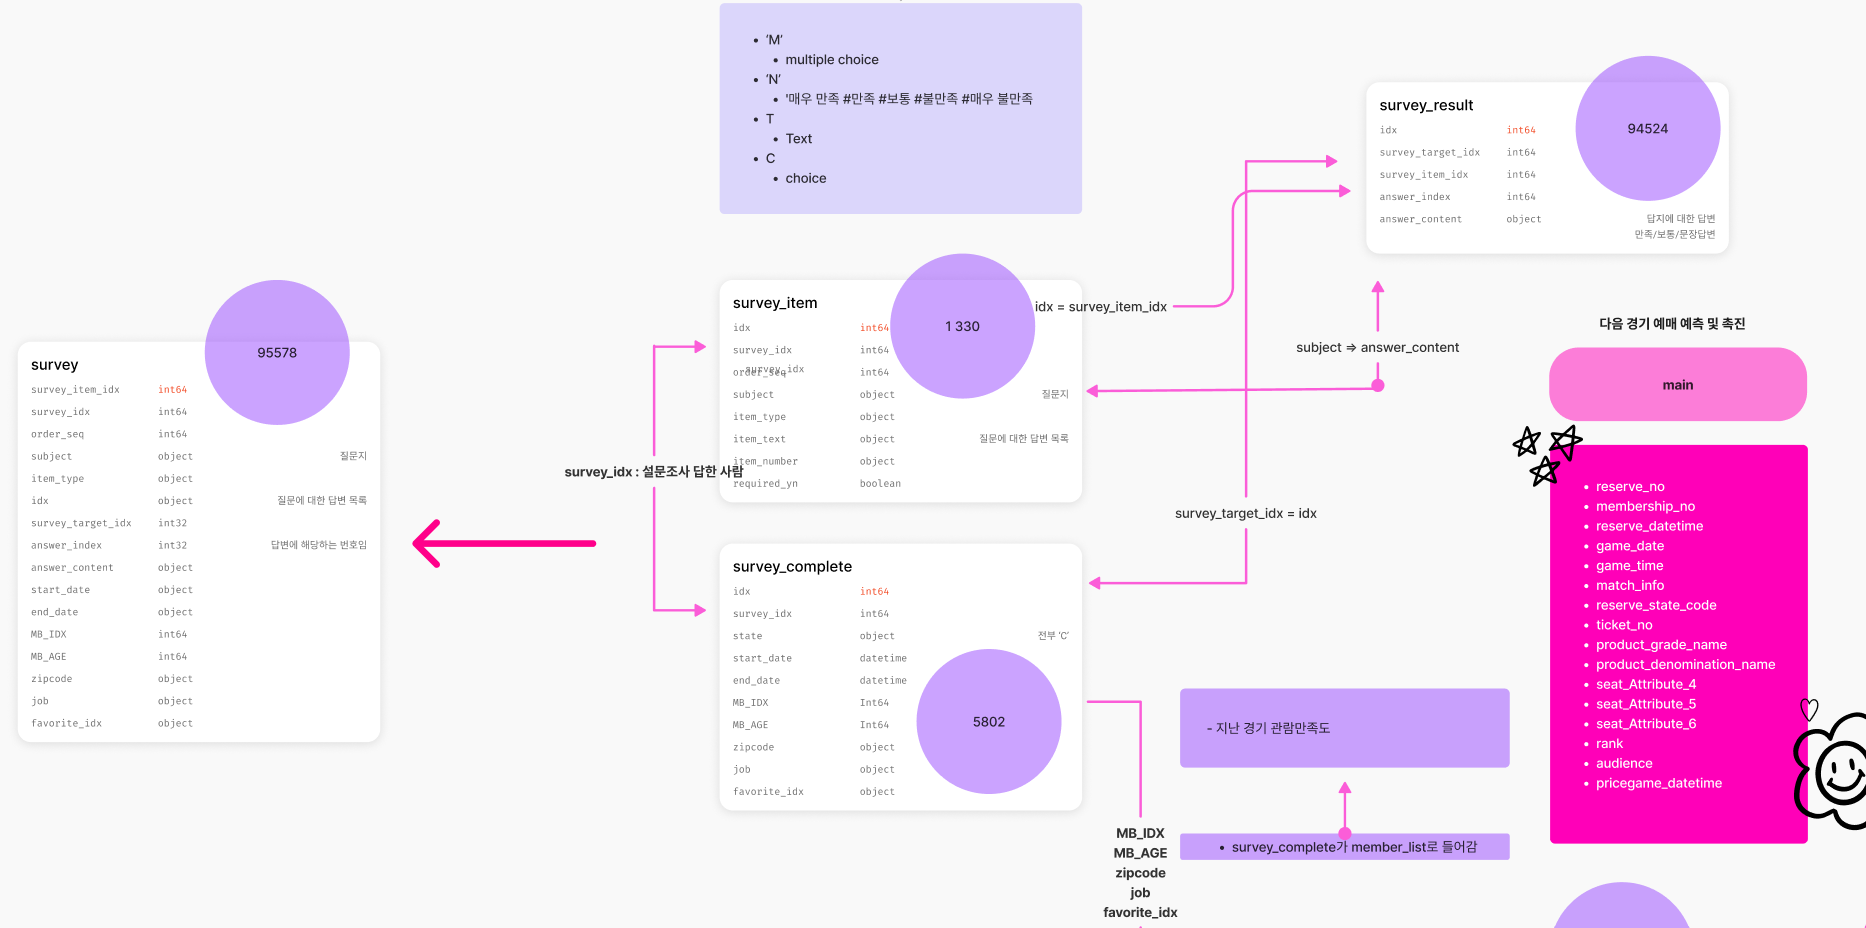

In [15]:
import pandas as pd
sc = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/survey_complete_.csv')
sc_c = sc.copy()

In [16]:
# 직업 분류해주기 #member_list와 동일한 방법 
sc_c['job'] = sc['job'].replace(['회사원(사무직/연구직)','회사원(제조/건설/기술직)','NULL','자영업자','전업주부',
                                   '대학생(대학원생 포함)','학생(초/중/고)','서비스업 종사자','교사','군인(소방/경찰/교정직 포함)',''
                                   '예술 및 디자인 종사자','금융 및 보험업 종사자','방송 및 언론 종사자','법률 종사자','농업 종사자(축산/수산/임업 포함)','보건 및 의료종사자'],
                    ['회사원','회사원','회사원','프리랜서','무직','대학생','학생', '회사원','교육직','군인','회사원','회사원','회사원','공무원','프리랜서','의료직'])
# 회사원으로 전처리 하기 
sc_c = sc_c.fillna('회사원')
# statecode 없애기 
sc_c = sc_c.drop('state', axis = 1)
# 나이 처리해주기 
sc_c['MB_AGE'] = list(map(lambda x : 2023 - sc_c['MB_AGE'][x] + 1, sc_c['MB_AGE']))

### Survey_item

In [17]:
si = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/survey_item.csv')
si_c = si.copy()
si_c = si_c.drop(['item_number','required_yn'], axis = 1)

In [18]:
# 필요없다고 판단되는 질문 삭제 ==> 태블로로 질문을 선택하는 방법도 있음 

# 테스트
# 블루마켓(MD샵)에 대한 만족도 평가입니다
si_c = si_c.drop([  72,   88,  130,  146,  171,  207,  242,  267,  292,  308,  334,
             456,  469,  483,  503,  521,  535,  555,  569,  585,  605,  619,
             639,  653,  673,  687,  707,  721,  741,  755,  775,  789,  809,
             838,  858,  888,  908,  938,  958,  988, 1008, 1038, 1058, 1091,
            1111, 1141, 1161, 1191, 1211, 1241, 1261, 1291, 1311, 135], axis = 0)
# 금일 좌석 이용
si_c = si_c.drop([93, 107], axis=0)
# 하이네켄
si_c = si_c.drop([339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351], axis=0)
# 아마존 면도기 , 좌석, 연령, 경품
si_c = si_c.drop([353, 354, 427,414, 425,427, 433,434,447, 478, 417, 423, 437, 97], axis=0)
# 제나벨
si_c = si_c.drop([415, 416, 418, 419, 422], axis=0)
# 레이지 소사이어티
si_c = si_c.drop([426, 428, 429, 435, 436], axis=0)
# 아마존 면도기 

si_c = si_c.drop([876, 926, 976, 1026, 1076, 1129, 1179, 1229, 1279, 1329], axis=0)
# 블루마켓
si_c = si_c.drop([16,   73,   89,  131,  147,  172,  208,  243,  268,  293,  309,
             335,  384,  386,  399,  400,  457,  470,  484,  504,  522,  536,
             556,  570,  586,  606,  620,  640,  654,  674,  688,  708,  722,
             742,  756,  776,  790,  810,  839,  859,  889,  909,  939,  959,
             989, 1009, 1039, 1059, 1092, 1112, 1142, 1162, 1192, 1212, 1242,
            1262, 1292, 1312], axis=0)
# 도착시간
si_c = si_c.drop([ 62,   78,  121,  137,  162,  198,  233,  258,  283,  298,  324,
             375,  390,  439,  445,  473,  489,  507,  525,  541,  559,  575,
             591,  609,  625,  643,  659,  677,  693,  711,  727,  745,  761,
             779,  795,  828,  844,  878,  894,  928,  944,  978,  994, 1028,
            1044, 1081, 1097, 1131, 1147, 1181, 1197, 1231, 1247, 1281, 1297, 18, 35])

### Survey_result

In [19]:
sr = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/survey_result.csv')

### EDA끝난 SURVEY 데이터 합치기 

In [20]:
# idx ==> survey_item_idx로 바꿈
si_c.columns = ['survey_item_idx','survey_idx','order_seq','subject','item_type','item_text']
# idx ==> survey_target_idx로 바꿈
sc_c.columns = ['survey_target_idx','survey_idx','start_date','end_date','MB_IDX','MB_AGE', 'zipcode', 'job', 'favorite_idx' ]

## join 해보기 
# survey_item과 survey_result를 
si_sr = pd.merge(left = si_c, right = sr, how = 'left', on=['survey_item_idx'])
sc_sr = pd.merge(left = sc_c, right = sr, how = 'left', on=['survey_target_idx'])

si_sr = si_sr.drop('item_text', axis = 1)
si_sr = si_sr.dropna(axis = 0)
si_sr = si_sr.astype({'idx' : int,
                      'survey_target_idx' : int,
                      'answer_index' : int})

sc_sr = sc_sr.dropna(axis = 0)
sc_sr = sc_sr.astype({'idx' : int,
                      'survey_item_idx' : int,
                      'answer_index' : int})

survey = pd.merge(left = si_sr, right = sc_sr, how = 'left', on=['survey_item_idx','survey_idx','idx','survey_target_idx','answer_index','answer_content'])
survey = survey.drop(survey[survey['answer_content'] == '없음'].index, axis = 0)
survey = survey.drop(['end_date','zipcode','survey_target_idx','idx','survey_item_idx','survey_idx'], axis = 1)

In [21]:
# 다른 df와 합치기 위해서 이름 바꿔주기 
survey = survey.rename(columns = {'MB_IDX' : 'membership_no'})

# 날짜데이터 전처리 초빼기
date = survey['start_date'].str.split(" ")
date_li = []
for i in date:
    date_li.append(i[0])

survey['start_date'] = date_li

# 중복값 제거와 필요없는 컬럼 제거하기 
survey = survey.drop_duplicates()
survey = survey.drop(['order_seq', 'answer_index'], axis =1)